In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.init as init
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchinfo import summary
import seaborn as sns
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
import os
from utils import *
from custom_layer import *
from base_model import *
import json

In [2]:
torch.set_num_threads(6)
# torch.set_num_interop_threads(1)
torch.backends.mkldnn.enabled = True

In [3]:
state = json.load(open('../../../dataset/DogVsCatDataset/preprocessed/final_split1/dataset_splits.json', 'r'))

criterion = torch.nn.CrossEntropyLoss()
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=40)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=40)

In [4]:
model1_0 = Model1(
    norm=nn.BatchNorm2d(10),
    post_conv=post_conv0
)
he_initialization(model1_0)
describe(model1_0)

MACs: 11.71 MMac, Params: 8.05 k
Layer (type:depth-idx)                   Output Shape              Param #
Model1                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 64, 64]           1,000
│    └─Sequential: 2-2                   [1, 20, 64, 64]           --
│    │    └─BatchNorm2d: 3-1             [1, 20, 64, 64]           40
│    │    └─PReLU: 3-2                   [1, 20, 64, 64]           1
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           990
│    └─Sequential: 2-4                   [1, 10, 64, 64]           --
│    │    └─BatchNorm2d: 3-3             [1, 10, 64, 64]           20
│    │    └─PReLU: 3-4                   [1, 10, 64, 64]           1
├─Sequential: 1-3                        [1, 1, 16, 16]            --
│    └─Conv2d: 2-5                       [1, 8, 32

Loading checkpoint from model_weights/model1_0.pt
Starting
Epoch 1/10: Train loss = 0.6169, Train accuracy = 0.6450, Test loss = 0.6171, Test accuracy = 0.6392


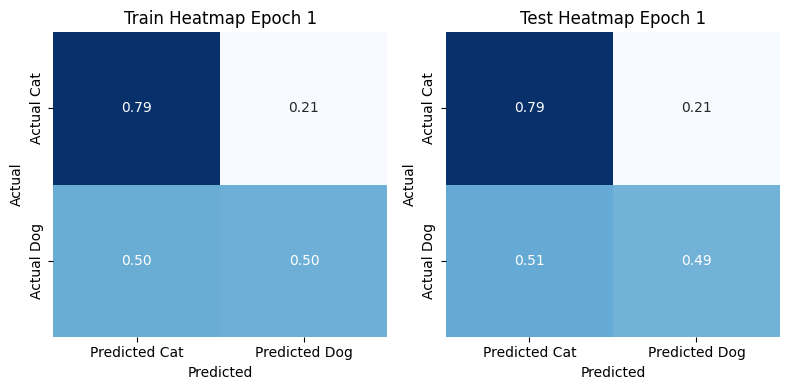

Epoch 2/10: Train loss = 0.5399, Train accuracy = 0.7258, Test loss = 0.5405, Test accuracy = 0.7204


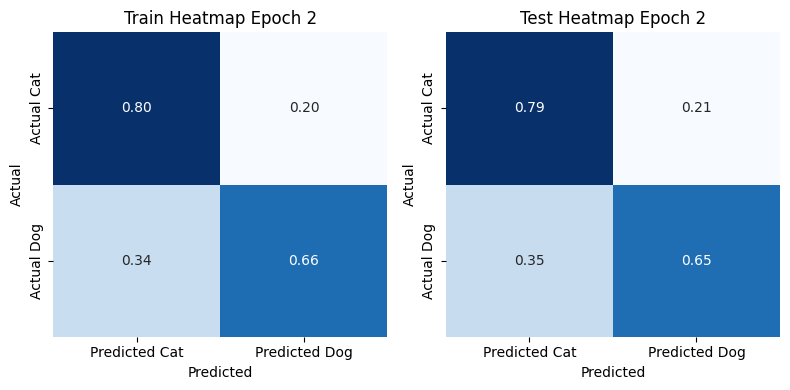

Epoch 3/10: Train loss = 0.4997, Train accuracy = 0.7572, Test loss = 0.5065, Test accuracy = 0.7509


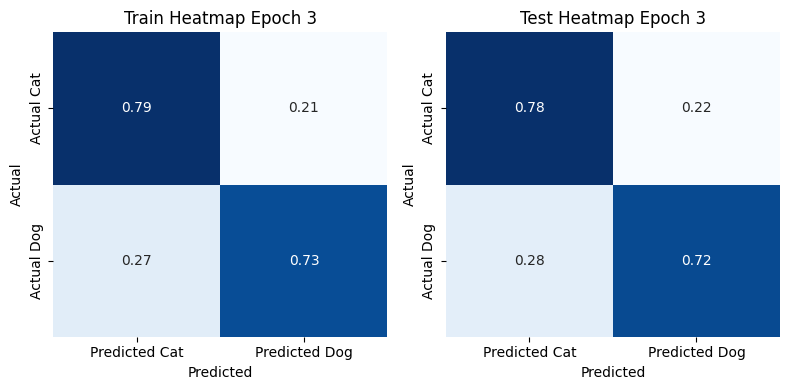

Epoch 4/10: Train loss = 0.4753, Train accuracy = 0.7740, Test loss = 0.4812, Test accuracy = 0.7664


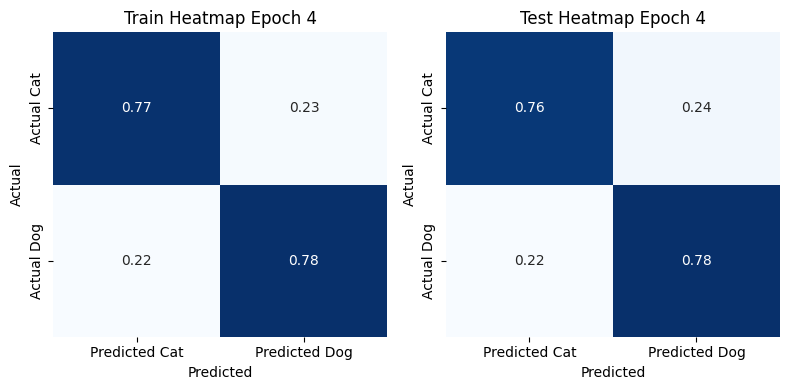

Epoch 5/10: Train loss = 0.4624, Train accuracy = 0.7806, Test loss = 0.4728, Test accuracy = 0.7714


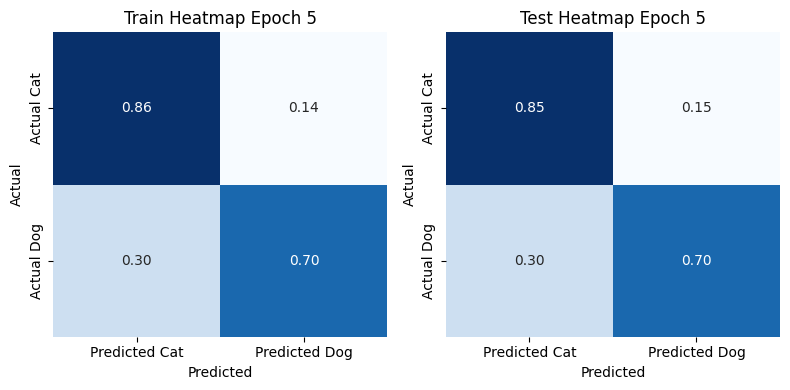

Epoch 6/10: Train loss = 0.4237, Train accuracy = 0.8062, Test loss = 0.4472, Test accuracy = 0.7907


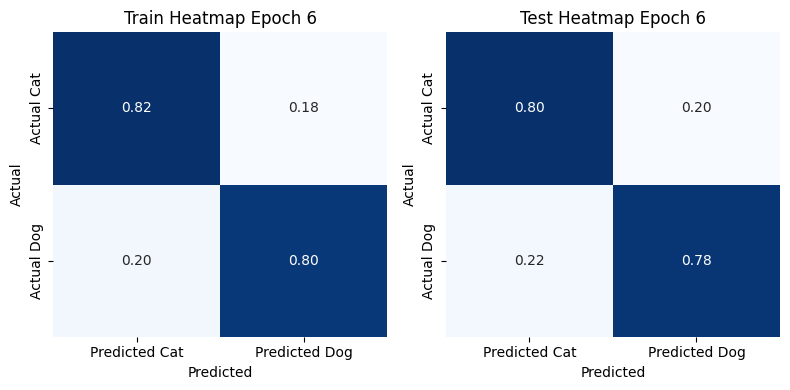

Epoch 7/10: Train loss = 0.4287, Train accuracy = 0.7996, Test loss = 0.4567, Test accuracy = 0.7872


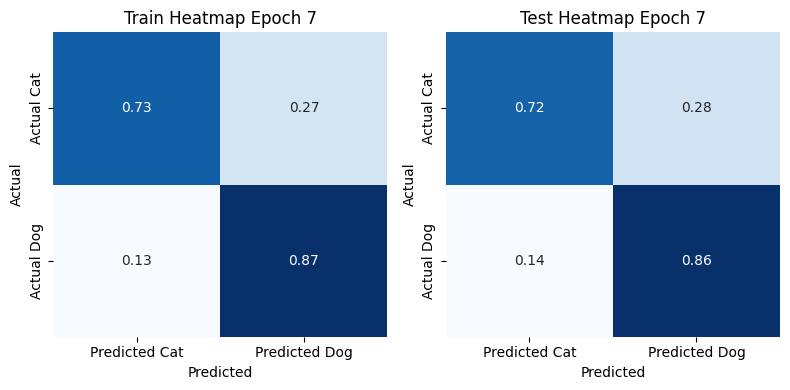

Epoch 8/10: Train loss = 0.3940, Train accuracy = 0.8234, Test loss = 0.4302, Test accuracy = 0.7996


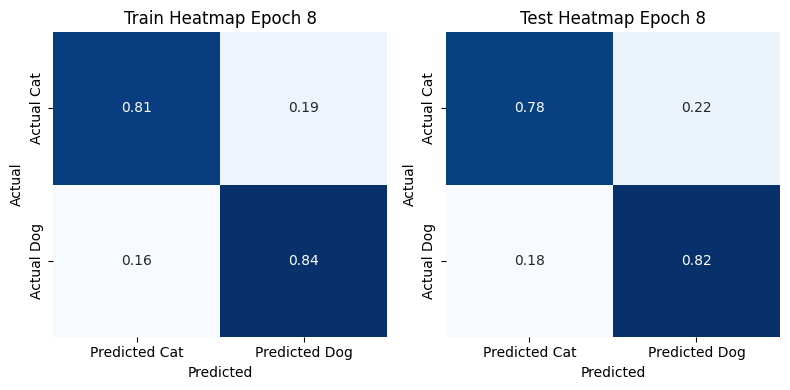

Epoch 9/10: Train loss = 0.3899, Train accuracy = 0.8243, Test loss = 0.4292, Test accuracy = 0.7988


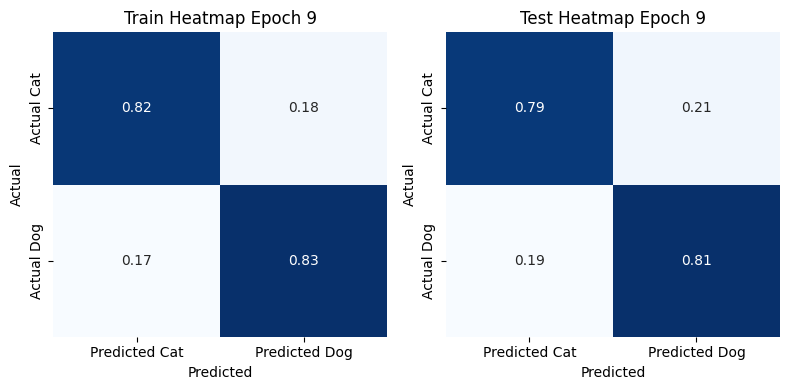

Epoch 10/10: Train loss = 0.3867, Train accuracy = 0.8267, Test loss = 0.4280, Test accuracy = 0.7993


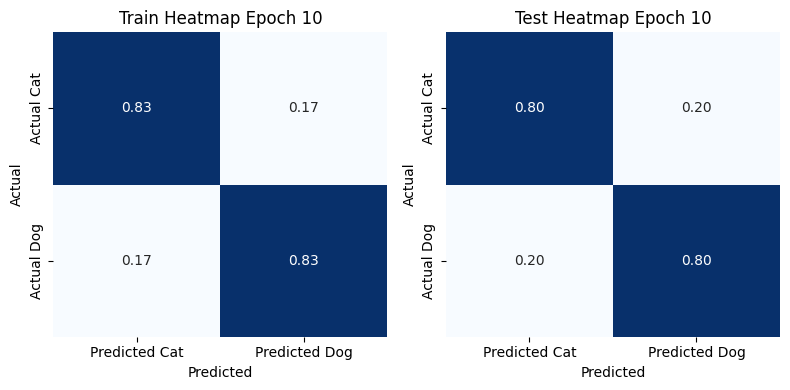

Training complete.


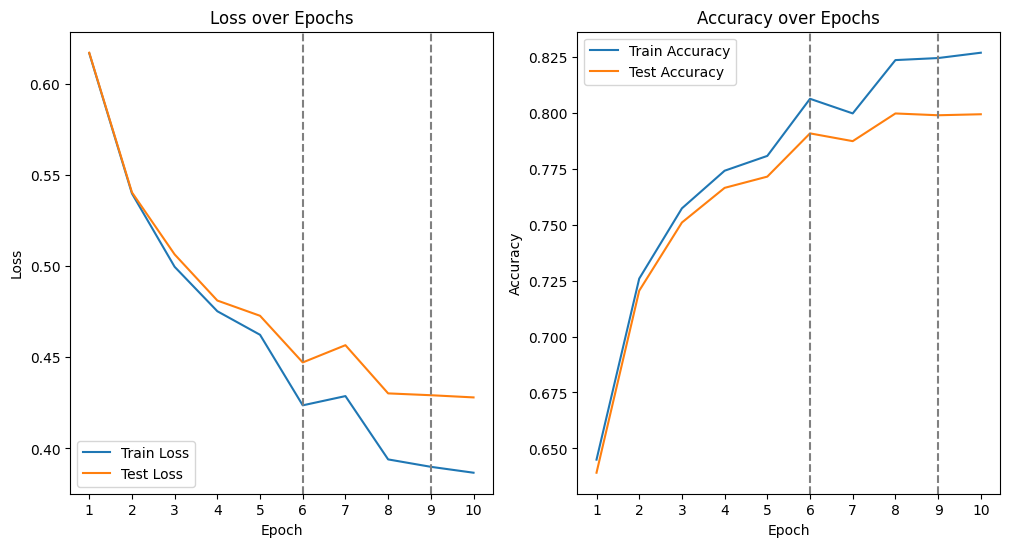

In [5]:
train(model1_0,"model_weights/model1_0.pt",criterion,train_dataset,test_dataset)